In [40]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
london = pd.read_csv('London_2014.csv', skipinitialspace = True)
london.head()

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,11,8,6,9,7,4,94,86,73,...,31,11,2,40,26,66.0,9.91,4.0,Rain,186<br />
1,2014-1-2,11,9,6,9,6,4,94,81,60,...,31,15,5,32,21,50.0,1.02,2.0,Rain,214<br />
2,2014-1-3,11,8,6,9,5,2,94,76,54,...,31,12,0,50,29,69.0,7.11,2.0,Rain-Thunderstorm,219<br />
3,2014-1-4,9,6,3,8,6,2,93,85,65,...,31,12,5,35,21,39.0,9.91,4.0,Rain,211<br />
4,2014-1-5,12,7,1,11,4,-1,100,88,77,...,31,14,5,35,16,NaN,0.25,5.0,Rain,199<br />


In [3]:
london.tail(2)

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
363,2014-12-30,6,1,-4,2,-1,-4,100,90,68,...,27,9,3,14,6,NaN,0.25,3.0,NaN,258<br />
364,2014-12-31,8,2,-4,5,2,-4,100,89,70,...,19,9,0,23,8,37.0,0.25,4.0,Fog,201<br />


In [4]:
london = london.rename(columns = {'WindDirDegrees<br />':'WindDirDegrees'})
london['WindDirDegrees']

0      186<br />
1      214<br />
2      219<br />
3      211<br />
4      199<br />
         ...    
360    330<br />
361      5<br />
362    289<br />
363    258<br />
364    201<br />
Name: WindDirDegrees, Length: 365, dtype: object

In [5]:
london ['WindDirDegrees'] = london ['WindDirDegrees'].str.rstrip('<br />')
london ['WindDirDegrees']

0      186
1      214
2      219
3      211
4      199
      ... 
360    330
361      5
362    289
363    258
364    201
Name: WindDirDegrees, Length: 365, dtype: object

In [6]:
london.head(2)

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2014-1-1,11,8,6,9,7,4,94,86,73,...,31,11,2,40,26,66.0,9.91,4.0,Rain,186
1,2014-1-2,11,9,6,9,6,4,94,81,60,...,31,15,5,32,21,50.0,1.02,2.0,Rain,214


In [7]:
london.isnull().head()

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [8]:
london[london['Events'].isnull()]
london = london.fillna('')

In [9]:
london.dtypes

GMT                            object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm                int64
Mean VisibilityKm               int64
Min VisibilitykM                int64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h             object
Precipitationmm               float64
CloudCover                     object
Events                         object
WindDirDegrees                 object
dtype: object

In [10]:
london['WindDirDegrees'] = london['WindDirDegrees'].astype('int64')

In [11]:
london['GMT'] = pd.to_datetime(london['GMT'])

In [12]:
london.dtypes

GMT                           datetime64[ns]
Max TemperatureC                       int64
Mean TemperatureC                      int64
Min TemperatureC                       int64
Dew PointC                             int64
MeanDew PointC                         int64
Min DewpointC                          int64
Max Humidity                           int64
Mean Humidity                          int64
Min Humidity                           int64
Max Sea Level PressurehPa              int64
Mean Sea Level PressurehPa             int64
Min Sea Level PressurehPa              int64
Max VisibilityKm                       int64
Mean VisibilityKm                      int64
Min VisibilitykM                       int64
Max Wind SpeedKm/h                     int64
Mean Wind SpeedKm/h                    int64
Max Gust SpeedKm/h                    object
Precipitationmm                      float64
CloudCover                            object
Events                                object
WindDirDeg

In [13]:
london[(london['WindDirDegrees']>=350)|(london['WindDirDegrees']<=10)]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
84,2014-03-26,9,6,2,4,2,-1,100,80,39,...,27,10,1,26,10,,2.03,4,Fog-Rain,3
90,2014-04-01,19,13,7,11,9,6,100,80,39,...,19,7,0,16,5,,0.00,4,Fog-Rain,6
100,2014-04-11,16,12,9,5,4,2,71,53,28,...,31,18,10,13,8,,0.00,1,,351
110,2014-04-21,19,12,5,11,8,4,100,78,31,...,26,7,0,14,6,,9.91,3,Fog-Rain-Thunderstorm,356
174,2014-06-24,24,19,13,15,12,9,94,66,27,...,31,12,0,23,8,37,0.00,3,Fog,350
179,2014-06-29,19,16,12,11,9,5,88,65,31,...,31,16,10,19,10,,0.00,2,Rain,9
190,2014-07-10,22,18,14,13,11,9,82,64,44,...,31,19,10,16,14,,0.00,3,,1
208,2014-07-28,23,19,14,16,12,9,94,66,33,...,26,12,2,21,10,,17.02,2,Rain-Thunderstorm,3
249,2014-09-07,21,17,13,14,12,8,94,71,41,...,23,10,2,11,6,,0.00,4,,354
250,2014-09-08,22,16,10,13,9,7,94,64,28,...,27,12,5,11,6,,0.00,1,,351


In [14]:
start_date = datetime(2014,4,1)
end_date = datetime(2014,4,11)
london[(london['GMT'] >= start_date) & (london["GMT"] <= end_date)]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
90,2014-04-01,19,13,7,11,9,6,100,80,39,...,19,7,0,16,5,,0.00,4,Fog-Rain,6
91,2014-04-02,18,14,11,11,9,7,88,71,48,...,10,8,5,23,13,,0.00,1,Rain,85
92,2014-04-03,18,14,11,11,9,9,88,75,52,...,21,7,3,26,11,,0.00,5,,96
93,2014-04-04,15,12,9,10,8,6,88,71,46,...,31,11,2,24,14,,0.00,5,,253
94,2014-04-05,14,10,6,11,8,5,100,83,56,...,31,12,1,26,13,50,0.00,5,Fog-Rain,197
95,2014-04-06,16,14,12,12,12,11,94,88,67,...,31,12,5,35,21,48,2.03,6,Rain,213
96,2014-04-07,14,11,8,12,11,6,94,87,76,...,31,14,5,29,23,42,2.03,5,Rain,209
97,2014-04-08,14,9,5,6,3,-1,87,64,26,...,31,15,10,39,23,,0.00,2,Rain,269
98,2014-04-09,17,10,4,7,6,3,93,68,38,...,31,14,6,23,13,,0.00,2,,261
99,2014-04-10,16,11,6,6,5,3,93,62,31,...,31,14,9,19,10,,0.00,3,,278


In [ ]:
In the cell below, write two lines of code to display the first five rows that have a missing value in 
the `'Max Gust SpeedKm/h'` column. Hint: first select the missing value rows and store them in a new dataframe, 
then display the first five rows of the new dataframe.

In [ ]:
PLOTTING/VISUALIZATION

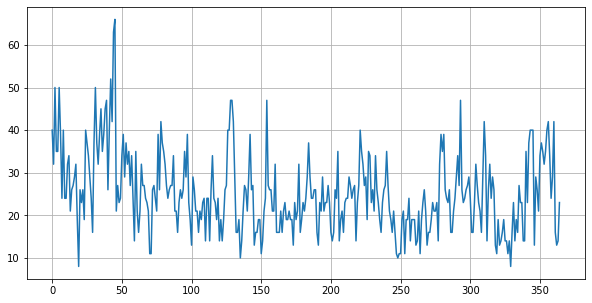

In [52]:
london["Max Wind SpeedKm/h"].plot(grid = True, figsize = (10,5))

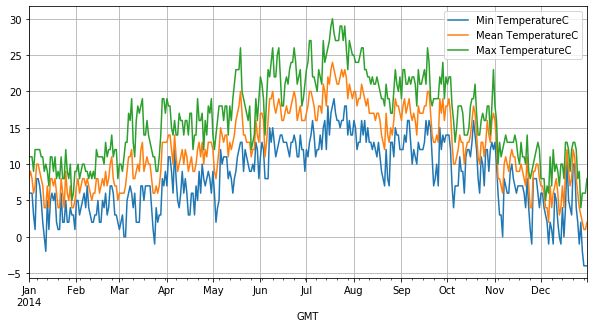

In [56]:
london[['Min TemperatureC','Mean TemperatureC','Max TemperatureC']].plot(grid = True,figsize = (10,5))

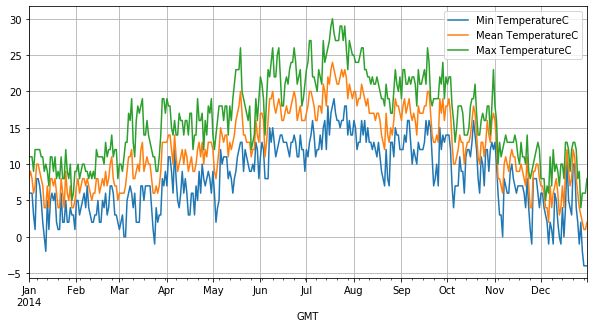

In [55]:
#indexing: changing what should appear at the x axis after plotting

london.index = london['GMT']
london[['Min TemperatureC','Mean TemperatureC','Max TemperatureC']].plot(grid = True,figsize = (10,5))

In [57]:
#use the .loc[] attribute after indexing rows instead of .iloc[]
london.loc[datetime(2014, 4, 3)]

GMT                           2014-04-03 00:00:00
Max TemperatureC                               18
Mean TemperatureC                              14
Min TemperatureC                               11
Dew PointC                                     11
MeanDew PointC                                  9
Min DewpointC                                   9
Max Humidity                                   88
Mean Humidity                                  75
Min Humidity                                   52
Max Sea Level PressurehPa                    1002
Mean Sea Level PressurehPa                   1000
Min Sea Level PressurehPa                     999
Max VisibilityKm                               21
Mean VisibilityKm                               7
Min VisibilitykM                                3
Max Wind SpeedKm/h                             26
Mean Wind SpeedKm/h                            11
Max Gust SpeedKm/h                               
Precipitationmm                                 0


In [ ]:
# Task
#Use the code cell below to plot the values of `'Mean Humidity'` during spring (full months of March, April and May).

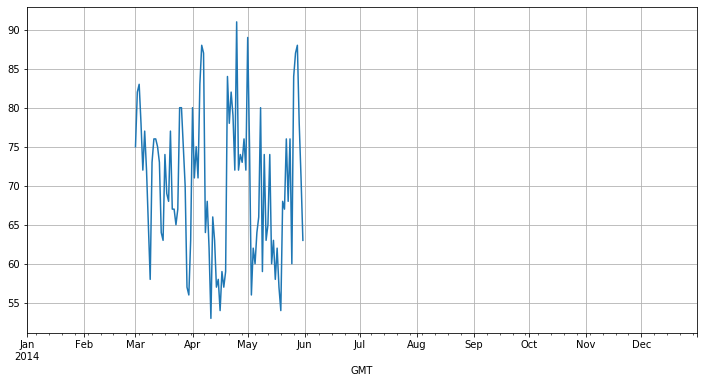

In [71]:
london.sort_index()
london["Mean Humidity"] = london["Mean Humidity"].loc[datetime(2014,3,1):datetime(2014,5,31)]
london['Mean Humidity'].plot(grid = True, figsize =(12,6))